# Ejemplo con library catalogs
## Preparación y carga de datos
En primer lugar se cargan las bibliotecas `pandas`, `ipywidgets` y la función propia `bar_scatter_plot` del archivo `plot_function.py`.


In [21]:
import pandas
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from plot_function import bar_scatter_plot

En siguiente lugar cargamos los datos, el fichero `data.csv` ubicado en el directorio `data`. Tras ello se previsualizan las primeras instancias.

In [13]:
datos = pandas.read_csv("data/datos.csv")
datos.head()

,Worldcat entity,Works,Publications,Library Holdings,Google Scholar Citations
0,"Cronin, Blaise",144,582,6749,11122.0
1,"Chen, Chaomei",42,243,5867,15968.0
2,"Egghe, L. (Leo)",57,186,3718,NaN
3,"Garfield, Eugene",150,447,3386,30105.0
4,"Moed, H. F.",45,165,2385,13026.0


Por último, modifico los nombres de la columnas para evitar problemas con los espacios.

In [14]:
datos.columns = ['Worldcat_entity', 'Works', 'Publications', 'Library_Holdings', 'Google_Scholar_Citations']
datos.head()

,Worldcat_entity,Works,Publications,Library_Holdings,Google_Scholar_Citations
0,"Cronin, Blaise",144,582,6749,11122.0
1,"Chen, Chaomei",42,243,5867,15968.0
2,"Egghe, L. (Leo)",57,186,3718,NaN
3,"Garfield, Eugene",150,447,3386,30105.0
4,"Moed, H. F.",45,165,2385,13026.0


## Visualización de los datos
En primer lugar hago una tabla interactiva con la que poder filtrar los datos de las distintas columnas.

In [4]:
@interact
def show_entities_more_than(column=['Works', 'Publications', 'Library_Holdings', 'Google_Scholar_Citations'], x=100):
    return datos.loc[datos[column] > x]

interactive(children=(Dropdown(description='column', options=('Works', 'Publications', 'Library_Holdings', 'Go…

Tras ello un gráfico de barras interactivo en el que aparecen dos series de datos.

In [5]:
@interact
def plot_entities_more_than(Serie1=['Works', 'Publications', 'Library_Holdings', 'Google_Scholar_Citations'],
                            Serie2=['Publications', 'Works', 'Library_Holdings', 'Google_Scholar_Citations']):
    
    grafico_barras = datos.plot.bar(x='Worldcat_entity', y=[Serie1, Serie2],
                                figsize=(20,10),
                                rot=45)
    grafico_barras = grafico_barras.set_xticklabels(datos.Worldcat_entity,
                                                fontdict={'horizontalalignment': 'right', 'size':12})
    return None

interactive(children=(Dropdown(description='Serie1', options=('Works', 'Publications', 'Library_Holdings', 'Go…

In [34]:
@interact
def plot_entities_more_than(Serie1=['Works', 'Publications', 'Library_Holdings', 'Google_Scholar_Citations'],
                            Serie2=['Publications', 'Works', 'Library_Holdings', 'Google_Scholar_Citations']):
    
    labels = datos['Worldcat_entity']
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(20,10), dpi= 100)
    rects1 = ax.bar(x - width/2, datos[Serie1], width, label=Serie1)
    rects2 = ax.bar(x + width/2, datos[Serie2], width, label=Serie2)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.legend()
    
    #autolabel(rects1)
    #autolabel(rects2)
    
    fig.tight_layout()
    
    return plt.show()


interactive(children=(Dropdown(description='Serie1', options=('Works', 'Publications', 'Library_Holdings', 'Go…

Por último, ejecuto la función que he preparado para hacer el ranking de autores por library holdings.

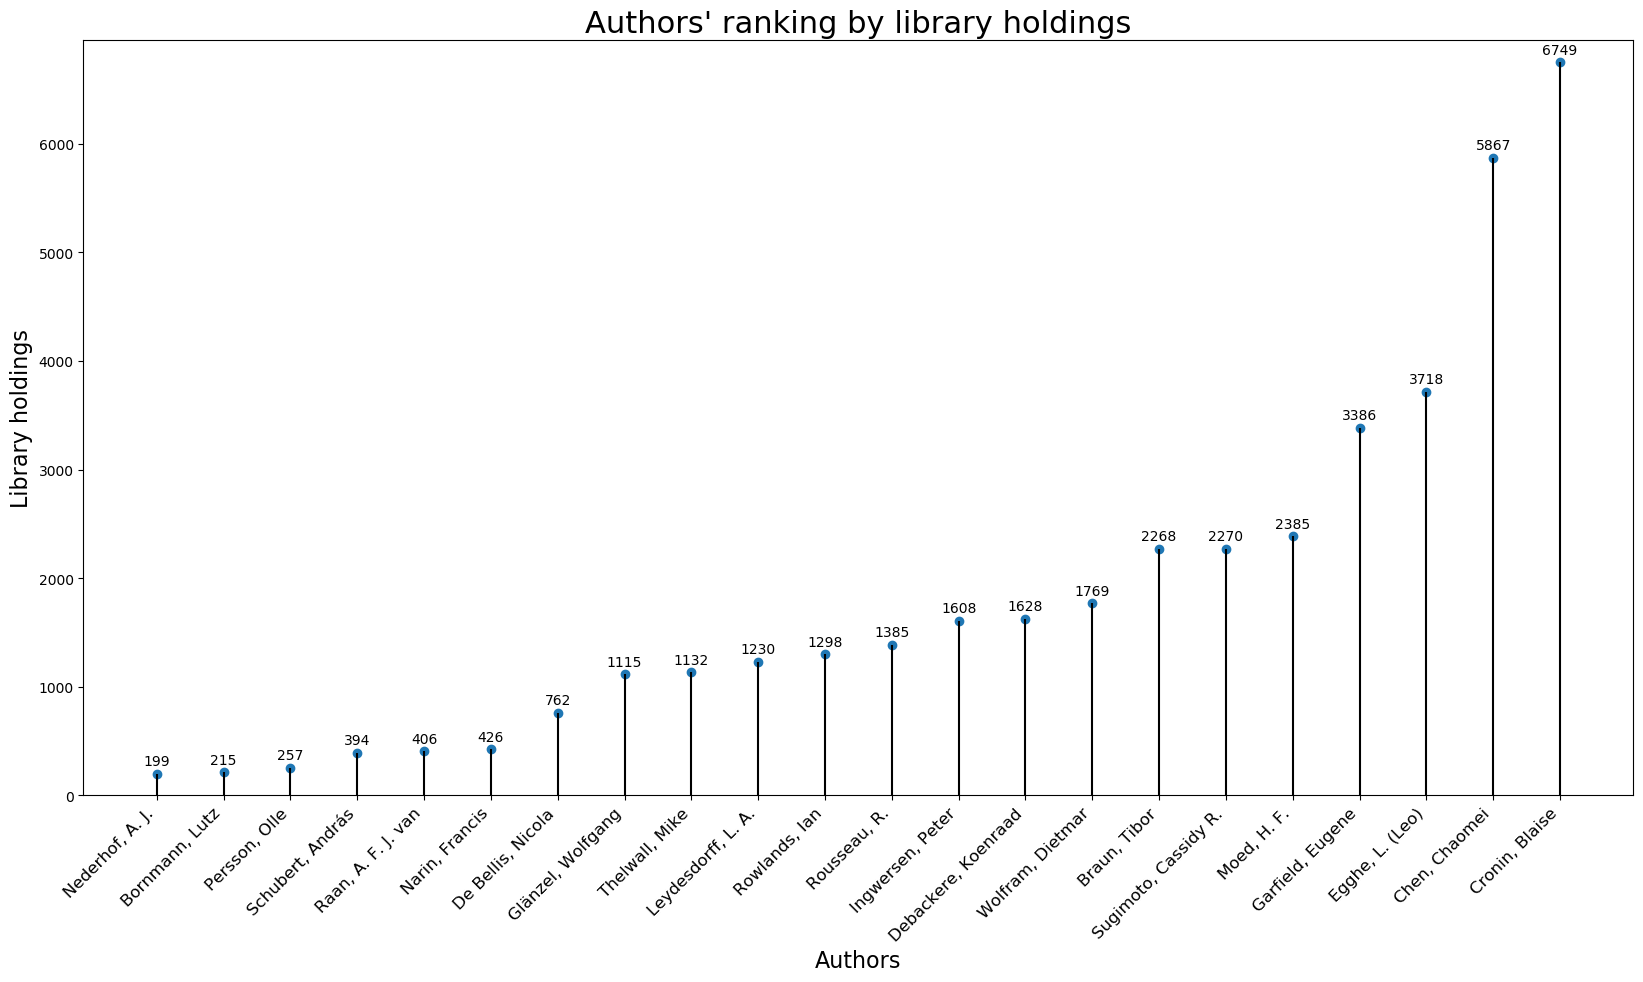

In [6]:
bar_scatter_plot(datos)